In [1]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import pickle

2022-12-12 18:33:56.364912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 18:33:56.619675: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yomna/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-12 18:33:56.619714: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 18:33:57.682483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer

In [2]:
#read modified data
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

#read modified data
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [3]:
X.shape

(2188, 100, 100)

In [4]:
y.shape

(2188,)

In [5]:
X[0]

array([[69, 70, 74, ..., 58, 56, 54],
       [71, 72, 74, ..., 58, 58, 54],
       [72, 72, 76, ..., 59, 58, 54],
       ...,
       [79, 79, 80, ..., 66, 64, 62],
       [78, 78, 79, ..., 64, 63, 62],
       [76, 78, 79, ..., 64, 63, 61]], dtype=uint8)

In [6]:
X = X/255.0
X[0]

array([[0.27058824, 0.2745098 , 0.29019608, ..., 0.22745098, 0.21960784,
        0.21176471],
       [0.27843137, 0.28235294, 0.29019608, ..., 0.22745098, 0.22745098,
        0.21176471],
       [0.28235294, 0.28235294, 0.29803922, ..., 0.23137255, 0.22745098,
        0.21176471],
       ...,
       [0.30980392, 0.30980392, 0.31372549, ..., 0.25882353, 0.25098039,
        0.24313725],
       [0.30588235, 0.30588235, 0.30980392, ..., 0.25098039, 0.24705882,
        0.24313725],
       [0.29803922, 0.30588235, 0.30980392, ..., 0.25098039, 0.24705882,
        0.23921569]])

1


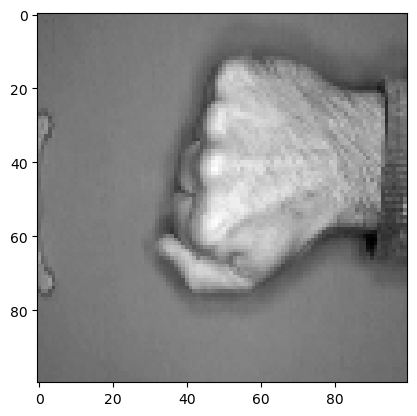

In [7]:
index = 1550
plt.imshow(X[index], cmap='gray')
print(y[index])

In [8]:
# model arch
model = tf.keras.models.Sequential()



# Add convolutions and max pooling
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100,1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(45, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))


model.add(tf.keras.layers.Dense(3, activation='softmax'))

2022-12-12 18:33:59.455971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 18:33:59.456463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yomna/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/home/yomna/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-12 18:33:59.456582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yomna/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/home/yomna/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-12-12 18

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 45)        13005     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 45)       0

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#batch_size: Divide the images if their number is large,so as to reduce the time
#validation_split: It divides the dataset into train and validation (0.1 validation)

model.fit(X, y, epochs=3, batch_size=15, validation_split=0.1)

Epoch 1/3
132/132 [==============================] - 9s 70ms/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 0.0571 - val_accuracy: 0.9954
Epoch 2/3
132/132 [==============================] - 10s 75ms/step - loss: 0.0154 - accuracy: 0.9970 - val_loss: 0.0336 - val_accuracy: 0.9909
Epoch 3/3
132/132 [==============================] - 10s 78ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0963 - val_accuracy: 0.9726


In [12]:
2100*0.1

210.0